<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Cutting_a_Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema Corte de varillas**
**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$.

**Salida**: Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

El problema de corte de varillas utiliza metodos de programacion dinamica para encontrar el precio optimo en que la "varilla" puede ser vendida con un mayor beneficio. Pero que es la programacion dinamica? su definicion es que mediante el almacenamiento y uso de soluciones anteriores (subproblemas) logra optimizar los algorimtos evitando trabajos redundantes. 




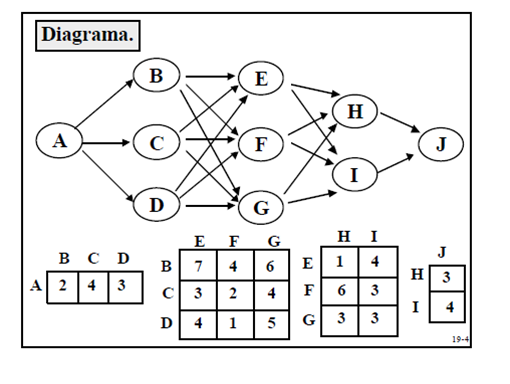

# 2. Algoritmo Cutting a Rod

A continuacion se mostrara el codigo que soluciona el problema de corte de varillas.

In [8]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
from copy import deepcopy

In [7]:
#Inicializador de precios
def cutrod_instance_generator(N):
  A = []
  prev = 0
  #Itera hasta n elementos
  for i in range(N):
    r=rd.randint(0,10) #Obtiene elemento random, rango = [0,10]
    #Agrega al arreglo de precios el acumulativo del elemento anterior y el actual
    A.append(prev+r) 
    prev+=r #Actualiza el acumulativo
  return A #Retorna el arreglo de precios

cutrod_instance_generator(10)

[6, 11, 21, 23, 26, 28, 34, 42, 45, 46]

In [83]:
#Funcion Cutting a Rod recursivo
min = -999999
llamadaRecursiva = 0
def cuttingRodRecursivo(p, n, verbose = False):
  global llamadaRecursiva;
  if n == 0: return 0; #caso base, ya no hay varilla por cortar.
  maxVal = min #Se inicializa con el menor numero.

  for i in range(1, n + 1):
    llamadaRecursiva = llamadaRecursiva + 1 #cantidad de recursiones.
    maxVal = max(maxVal, p[i - 1] + cuttingRodRecursivo(p, n - i, verbose))
    if verbose:
      print("Varilla de largo", i)
      print("Maxima ganancia Actual: ", maxVal)
      print("")

  return maxVal #retorna la solucion de la recursion.



In [84]:
#Funcion Cutting a Rod dinamico
min = -999999
def cuttingRodDinamico(price, n, verbose = False, cont = 0, comp = 0):
  a = [0 for x in range(n + 1)]
  b = [0 for x in range(n + 1)]
  a[0] = 0

  #Se iteran todos los subproblemas desde el tamaño 1 hasta n
  for i in range(1, n + 1):
    cont = cont + 1 #contador de subproblemas
    if verbose:
      print("Varilla de largo", i)
      print("---------------------------------------")

    maxVal = min #Se calcula la maxima ganancia obtenida por cada subproblema 


    #Mediante programacion dinamica guardamos las soluciones anteriores para para resolver los problemas siguientes.
    for j in range(i):
      comp = comp + 1 #contador de comparaciones que realiza

      if verbose:
        print("")
        print("Caso: ", j + 1 , "para varilla de largo", i)
        print("Maxima ganancia: ", maxVal) 
      maxVal = max(maxVal, price[j] + a[i - j - 1])
      a[i] = maxVal #se guarda la solucion

      if verbose:
        print("Tras comparar los valores la maxima ganacia queda de la siguiente manera")
        print("Maxima ganancia Actual: ", maxVal)
    if verbose:
      print("---------------------------------------")
      print("")

  return a[n], cont, comp
 

# 2.2. Descripcion del algoritmo
El algoritmo o codigo recibe inicialmente un arreglo de n elementos numericos que equivalen a los precios por cada medida.
Y retorna el corte maximo que se puede obtener vendiendo las partes.

Algoritmo hecho con programacion dinamica: 

1. Primero se debe observar cual seria la solcuion mas optima para realizacion del algoritmo de corte de varillas que en este caso es (maxVal, price[j] + a[i - j - 1]).

2. Tras hacer esto ordenamos los problemas de menor a mayor, de modo que guardemos el resultado asociado a cada subproblema. 

3. Para que por medio de la utilizacion de los resultados anteriores encuentre el precio optimo para conseguir la mayor ganancia.

Algoritmo hecho recurisvamente:

1. Primero se debe observar cual seria la solucion mas optima para realizacion del algoritmo de corte de varillas que en este caso es (maxVal, price[j] + a[i - j - 1]).

2. Tras hacer esto recursivamente vamos solucionando los problemas hasta encontrar la solucion mas optima, aunque debido a que las soluciones anteriores no son almacenadas sucede que por cada iteracion se deban realizar nuevamente los problemas antes resueltos dando asi una mayor complejidad.

3. Debido a que el algoritmo es recursivo mediante la solucion de los problemas encuentra la solucion mas optima.



#3. Ejecucion del algoritmo paso a paso (verbose=True)
A continuacion se mostrara la ejecucion del algoritmo.

In [88]:
#Cutting a Rod recursivo
arreglo = [1,5,8,9,10,17,17,20]
largo = len(arreglo)
llamadaRecursiva = 0
a = cuttingRodRecursivo(arreglo, largo, True)
print("La ganancia  maxima es:",a)
print("Cantidad de llamadas: ",llamadaRecursiva)

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla de largo 1
Maxima ganancia Actual:  2

Varilla de largo 2
Maxima ganancia Actual:  5

Varilla de largo 1
Maxima ganancia Actual:  6

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla de largo 2
Maxima ganancia Actual:  6

Varilla de largo 3
Maxima ganancia Actual:  8

Varilla de largo 1
Maxima ganancia Actual:  9

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla de largo 1
Maxima ganancia Actual:  2

Varilla de largo 2
Maxima ganancia Actual:  5

Varilla de largo 2
Maxima ganancia Actual:  10

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla de largo 3
Maxima ganancia Actual:  10

Varilla de largo 4
Maxima ganancia Actual:  10

Varilla de largo 1
Maxima ganancia Actual:  11

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla de largo 1
Maxima ganancia Actual:  2

Varilla de largo 2
Maxima ganancia Actual:  5

Varilla de largo 1
Maxima ganancia Actual:  6

Varilla de largo 1
Maxima ganancia Actual:  1

Varilla d

In [87]:
#Cutting a Rod utilizando programacion dinamica
arreglo = [1,5,8,9,10,17,17,20]
largo = len(arreglo)
a, cont, comp = cuttingRodDinamico(arreglo, largo, True)
print("La ganancia maxima es:", a)
print("Cantidad de comparaciones: ",comp)
print("Cantidad de subproblemas", cont)

Varilla de largo 1
---------------------------------------

Caso:  1 para varilla de largo 1
Maxima ganancia:  -999999
Tras comparar los valores la maxima ganacia queda de la siguiente manera
Maxima ganancia Actual:  1
---------------------------------------

Varilla de largo 2
---------------------------------------

Caso:  1 para varilla de largo 2
Maxima ganancia:  -999999
Tras comparar los valores la maxima ganacia queda de la siguiente manera
Maxima ganancia Actual:  2

Caso:  2 para varilla de largo 2
Maxima ganancia:  2
Tras comparar los valores la maxima ganacia queda de la siguiente manera
Maxima ganancia Actual:  5
---------------------------------------

Varilla de largo 3
---------------------------------------

Caso:  1 para varilla de largo 3
Maxima ganancia:  -999999
Tras comparar los valores la maxima ganacia queda de la siguiente manera
Maxima ganancia Actual:  6

Caso:  2 para varilla de largo 3
Maxima ganancia:  6
Tras comparar los valores la maxima ganacia queda de 

## **4. Correctitud del algoritmo de Corte de varilla con Bottom-up**

### **Teorema**
*El algoritmo **cuttingRodDinamico** en cada iteración retorna el máximo beneficio posible para vender la varilla de largo $n$.*

#### **Por inducción matemática**

##### **Caso base:** Cuando la varilla es de largo $n = 0$, entonces su valor debe ser $0$, puesto que se puede inferir que con longitud $0$ "no existe varilla la cual vender".

##### **Paso inductivo:**
Cuando la varilla es de un largo $n$, con $n$ entre $1$ y el máximo largo al que podremos vender una varilla, entonces obtendremos el máximo beneficio posible a partir de la instrucción.
> $r(n) = max(p(i)+r(n-i),p(n))$

Donde podremos identificar 2 posibles casos:


1.   Cuando es mayor $p(n)$ significa que el máximo beneficio posible para vender la varilla de largo $n$ será el valor de la misma, $r(n) = p(n)$

2.   Cuando es mayor $p(i) + r(n-i)$ significa que el máximo beneficio posible se obtiene cortando la varilla, vendiendo el primer trozo y calculando la máxima ganancia para el trozo restante, $r(n) = p(i) + r(n-i)$. El beneficio máximo para una varilla de largo $n-i$ fue resuelto en iteraciones anteriores, por lo que siempre retornará la mayor ganacia para un subproblema $r(n-i)$.




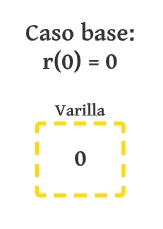

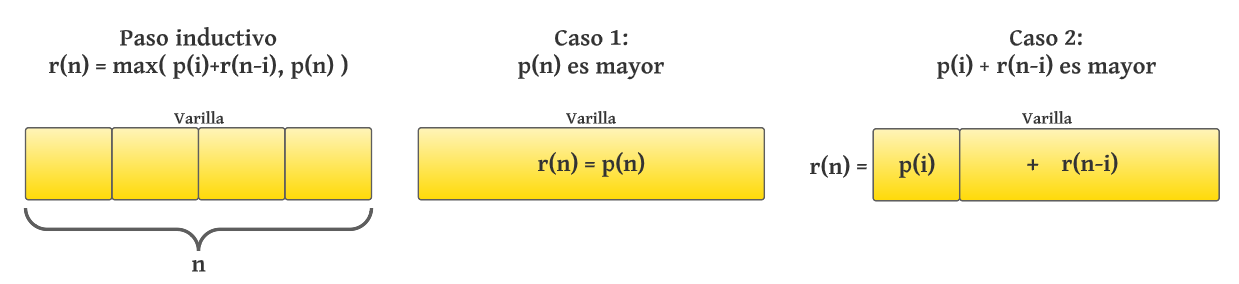

## **5. Tiempo de ejecución**

### **5.1. cuttingRodRecursivo (recursivo sin programación dinámica)**

#### **Teorema**
*El algoritmo **cuttingRodRecursivo** tiene un tiempo de ejecución $O(2^n)$.*

#### **Función recursiva**
Se define una función recursiva que modele la división del problema original $T(n)$:
>$T(n) = ∑_{j=0}^{n-1}T(j) + 1$

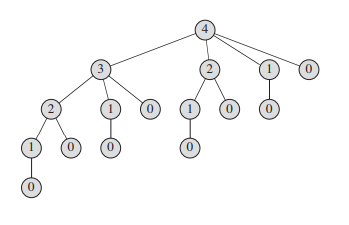

#### **Método de sustitución**
Ahora, usando el método de sustitución, probaremos que $O(2^n)$ es efectivamente una cota superior asintótica para $T(n)$.

Debemos probar que $T(n) \leq c · 2^n$, para algún valor de $c>0$.
Para ello, asumimos que esto es cierto (inducción) y **sustituimos en la recursión**, los valores de $T(n)$ por $c · 2^n$:

>$T(n) \leq ∑_{j=0}^{n-1}c · 2^j + 1 \leq c · 2^n$
>
>$T(n) \leq c · (2^n-1) + 1 \leq c · 2^n$
>
>$T(n) \leq c · 2^n - c + 1 \leq c · 2^n$
>
>$-c \leq -1$
>
>$c ≥ 1$ 

Por lo que efectivamente $c⋅2^n=O(2^n)$ es una cota asintótica superior para el algoritmo.

### **5.2. cuttingRodDinamico (iterativo con programación dinámica)**

#### **Teorema**
*El algoritmo **cuttingRodDinamico** tiene un tiempo de ejecución $O(n^2)$.*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

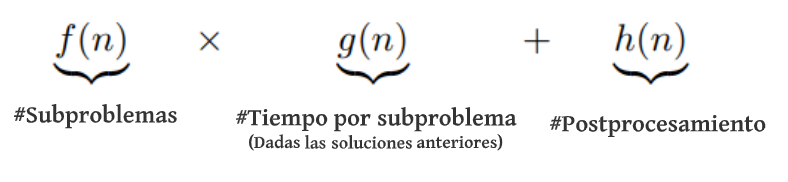

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para una varilla de largo $n$, resulta en una cantidad de $n$ subproblemas.

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este varía en función del tamaño de varilla del subproblema actual a resolver. Se calcula como la cantidad de soluciones anteriores al subproblema actual de largo $j$.

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en instrucciones para almacenar la solución dinámicamente.

Reemplazando obtendremos:
>$T(n) = \sum_{j=1}^{n}\sum_{i=1}^{j}·c$
>
>$T(n) = c·\sum_{j=1}^{n}j$
>
>$T(n) = c·\frac{n(n+1)}{2}$
>
>$T(n) = c·(\frac{n^2}{2}+\frac{n}{2})$
>
>$T(n) = O(n^2)$





#### **Complejidad espacial**
*El algoritmo **cuttingRodDinamico** tiene una complejidad espacial $O(n)$.*

Se obtiene el orden $O(n)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Representación de subproblemas resueltos y los subproblemas anteriores utilizados para la solución:

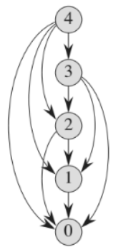

Para el ejemplo anterior, con un largo de varilla igual a 4, solo se necesito almacenar los problemas anteriores a este, los cuales son 4-1, además para retornar la solución final al problema se necesita almacenar un subproblema más, el del 4. En términos generales, para resolver cualquier problema $n$ es necesario almacenar $n-1$ soluciones anteriores y para retornar la solución actual $n-1+1$, lo que da un total de $n$ subproblemas, por este motivo la cantidad de memoria requerida es de orden $O(n)$.



## **6. Experimentos**

### **6.1. Tiempo de ejecución cuttingRodRecursivo v/s cuttingRodDinamico**

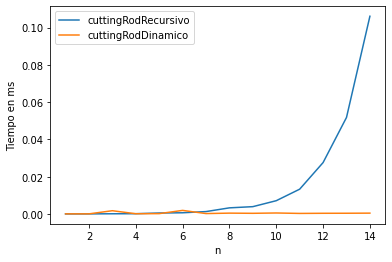

In [89]:
x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  a = cutrod_instance_generator(n)
  b = deepcopy(a)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces cuttingRodDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import cuttingRodDinamico", stmt=f"cuttingRodDinamico({b},{n})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces cuttingRodRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_NoDynamic = repeat(setup="from __main__ import cuttingRodRecursivo", stmt=f"cuttingRodRecursivo({a},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["cuttingRodRecursivo","cuttingRodDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Es bastante evidente que al utilizar la programación dinámica se optimiza en gran medida el algoritmo. La variante cuttingRodRecursivo dibuja una curva exponencial al igual que se habia predicho en el tiempo de ejecución, mientras que la variante Bottom-up tan solo debería tener una curva cuadrática que no se logra apreciar por la escala del gráfico.

La gran diferencia entre ambos se debe a que en función de un largo de varilla mayor, la cantidad de procesos que se repiten en cuttingRodRecursivo crece de forma exponencial al tener que recalcularse en repetidas ocasiones los mismos subproblemas, dificultad que no presenta cuttingRodDinamico, ya que nunca repite más de una vez un subproblema.

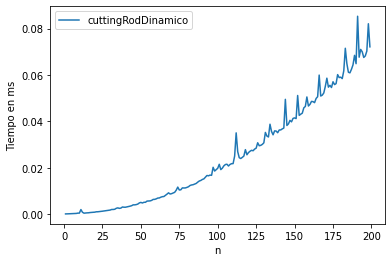

In [90]:
x=[]
y_Dynamic = []

for n in range(1,200):
  b = cutrod_instance_generator(n)
  b.insert(0, 0)
  
  #la función repeat está ejecutando 20 veces cuttingRodDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import cuttingRodDinamico", stmt=f"cuttingRodDinamico({b},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)

plt.plot(x,y_Dynamic)
plt.legend(["cuttingRodDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Podemos apreciar en el gráfico anterior la forma de la curva construida por cuttingRodDinamico, que guarda similitud con una función cuadrática, al igual que la cota superior calculada para el algoritmo en la sección 5 de tiempo de ejecución.

### **6.2. Cantidad de subproblemas en función del largo cuttingRodDinamico**


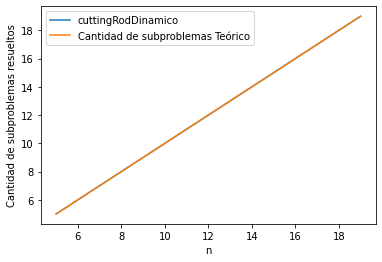

In [91]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoCant=[n for n in range(5,20)] # La cantidad teórica de subproblemas en resolver
y_cant=[]; 

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, cont, comp= cuttingRodDinamico(a,n)
  y_cant.append(cont)

plt.plot(x,y_cant)
plt.plot(x,y_TheoCant)
plt.legend(["cuttingRodDinamico", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas resueltos')
plt.show()

Podemos observar que la predicción de subproblemas que resuelve el algoritmo es correcta, en función del largo de la varilla $n$, el algoritmo resuelve $n$ subproblemas, ya que utiliza la técnica Bottom-up, es decir, los subproblemas son resueltos desde el $1$ hasta $n$.

### **6.3. Cantidad de llamadas a subproblemas anteriores en función del largo cuttingRodDinamico**


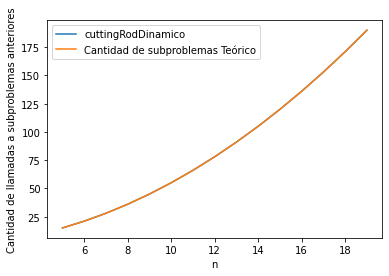

In [92]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y_TheoComp=[(n*(n+1))/2 for n in range(5,20)] # La cantidad teórica de comparaciones
y_comp=[];  
comp = 0                        # para obtener el máximo beneficio de cada subproblema

for n in range(5,20):
  a = cutrod_instance_generator(n)
  a.insert(0, 0)
  r, cont, comp = cuttingRodDinamico(a, n)
  y_comp.append(comp)

plt.plot(x,y_comp)
plt.plot(x,y_TheoComp)
plt.legend(["cuttingRodDinamico", "Cantidad de subproblemas Teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de llamadas a subproblemas anteriores')
plt.show()

Por lo que se puede observar, también es correcto afirmar que la cantidad de llamadas a subproblemas anteriores en función de $n$ es $\sum_{i=1}^{n}i$, esto se debe a que el algoritmo en cada iteración $i$ debe utilizar $i$ problemas ya resueltos para obtener la solución (se considera el subproblema 0).